In [1]:
import matplotlib.pyplot as plt
import numpy as np
from torch import exp, nn, no_grad, optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms.v2 import ToTensor, Compose, Resize, Normalize, CenterCrop

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according 

In [2]:
TRAIN_PATH = "../alzheimers_dataset/train"
TEST_PATH = "../alzheimers_dataset/test"

In [3]:
transforms = Compose(
    [Resize((256, 256)), CenterCrop(224), ToTensor(), Normalize([0.5], [0.5])]
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [4]:
train_set = ImageFolder(root=TRAIN_PATH, transform=transforms)
test_set = ImageFolder(root=TEST_PATH, transform=transforms)

In [5]:
train_loader = DataLoader(train_set, shuffle=True)
test_loader = DataLoader(test_set, shuffle=True)

In [6]:
print(train_set)

Dataset ImageFolder
    Number of datapoints: 5121
    Root location: ../alzheimers_dataset/train
    StandardTransform
Transform: Compose(
                 Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 CenterCrop(size=(224, 224))
                 ToTensor()
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )


In [7]:
print(train_set.classes)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [8]:
print(len(train_loader))

5121


In [9]:
print(test_set)

Dataset ImageFolder
    Number of datapoints: 1279
    Root location: ../alzheimers_dataset/test
    StandardTransform
Transform: Compose(
                 Resize(size=[256, 256], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 CenterCrop(size=(224, 224))
                 ToTensor()
                 Normalize(mean=[0.5], std=[0.5], inplace=False)
           )


In [10]:
print(test_set.classes)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [11]:
print(len(test_loader))

1279


In [12]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

/var/folders/gh/h3xf46_564xddxy0lr8jzc2m0000gn/T/ipykernel_60683/2569669039.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


IndexError: index 1 is out of bounds for dimension 0 with size 1

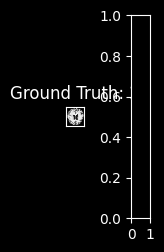

In [13]:
# plot images from training set

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision


In [ ]:
input_size = 90000
hidden_sizes = [9000, 900, 90]
output_size = 4
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.Sigmoid(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.Tanh(),
    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
    nn.LeakyReLU(),
    nn.Linear(hidden_sizes[2], output_size),
    nn.ReLU(),
)
print(model)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images)  # log probabilities
loss = criterion(logps, labels)  # calculate the NLL loss

In [ ]:
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        # This is where the model learns by backpropagating
        loss.backward()

        # And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print(
            "Epoch {} - Training loss: {}".format(e, running_loss / len(train_loader))
        )

In [ ]:
def view_classify(img, ps):
    """Function for viewing an image and it's predicted classes."""
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    ax1.imshow(img.resize_(208, 176, 1).numpy().squeeze())
    ax1.axis("off")
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title("Class Probability")
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
images, labels = next(iter(test_loader))

img = images[0].view(1, 109824)
with no_grad():
    logps = model(img)

ps = exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(3, 208, 176), ps)

In [ ]:
correct_count, all_count = 0, 0
for images, labels in test_loader:
    for i in range(len(labels)):
        img = images[i].view(1, 109824)
        with no_grad():
            logps = model(img)
        ps = exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if true_label == pred_label:
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count / all_count))